## Correspondence-Aware ICP with Scaling: An Introduction

In [56]:
import numpy as np

def procrustes_similarity(A, B):
    """
    Finds the best-fit similarity transform (s*R*A + t) to align A to B.
    Returns scale s, rotation matrix R, translation vector t.
    A, B: Nx2 arrays of corresponding points.
    """
    assert A.shape == B.shape

    # Center the point clouds
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # Compute scaling
    var_A = np.sum(AA ** 2)
    H = AA.T @ BB
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # Reflection correction
    if np.linalg.det(R) < 0:
        Vt[1, :] *= -1
        R = Vt.T @ U.T

    scale = np.trace(np.diag(S)) / var_A

    # Translation
    t = centroid_B - scale * R @ centroid_A

    return scale, R, t

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_src_dest(src, dest, src_label='Source', dest_label='Destination'):
    """
    Plots source and destination 2D points on the same plot with different colors.

    Args:
        src (np.ndarray): Nx2 array of source points.
        dest (np.ndarray): Nx2 array of destination points.
        src_label (str): Label for source points.
        dest_label (str): Label for destination points.
    """
    plt.figure(figsize=(7,7))
    plt.scatter(src[:,0], src[:,1], color='blue', label=src_label, s=50)
    plt.scatter(dest[:,0], dest[:,1], color='red', marker='x', label=dest_label, s=50)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Source and Destination Points")
    plt.axis('equal')
    plt.grid(True)
    plt.show()


def test(src, dest, plot=True):
    # Compute the Procrustes similarity transform
    scale, R, t = procrustes_similarity(src, dest)
    src_transformed = scale * (R @ src.T).T + t

    # Print the initial src and dest points && Print the transformed source points and dest points
    if plot:
        plot_src_dest(src, dest, 'Source Points', 'Destination Points')
        plot_src_dest(src_transformed, dest, 'Transformed Source Points', 'Destination Points')

## Experiment 1: Exact match

In [58]:
# Set random seed for reproducibility
# np.random.seed(42)

A = np.random.rand(30, 2)
B = A.copy()

test(A, B, False)

## Experiment 2: Rotated

In [59]:
A = np.random.rand(30, 2)
B = A.copy()

# Choose a random rotation angle in radians
theta = np.random.uniform(0, 2 * np.pi)
# Create the rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Apply rotation to A
A = (R @ A.T).T

test(A, B, False)

## Experiment 3: Transformed

In [60]:
A = np.random.rand(30, 2)
B = A.copy()

# Choose a random 2D translation vector
t = np.random.uniform(-5, 5, size=(2,))

# Apply translation to A
A = A + t

test(A, B, False)

## Experiment 4: Scaled

In [61]:
A = np.random.rand(30, 2)
B = A.copy()

# Choose a random positive scaling factor (not 1)
scale = np.random.uniform(0.5, 2.0)

# Apply scaling to A (about the origin)
A = A * scale

test(A, B, False)

## Experiment 5: All 3 transformations

In [62]:
A = np.random.rand(30, 2)
B = A.copy()

# 1. Random rotation
theta = np.random.uniform(0, 2 * np.pi)
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# 2. Random scaling (positive, not 1)
scale = np.random.uniform(0.5, 2.0)

# 3. Random translation
t = np.random.uniform(-5, 5, size=(2,))

# Apply all transformations: scale, rotate, then translate
A = scale * (R @ A.T).T + t

test(A, B, False)

## Experiment 6: All 3 transformations (with noise)

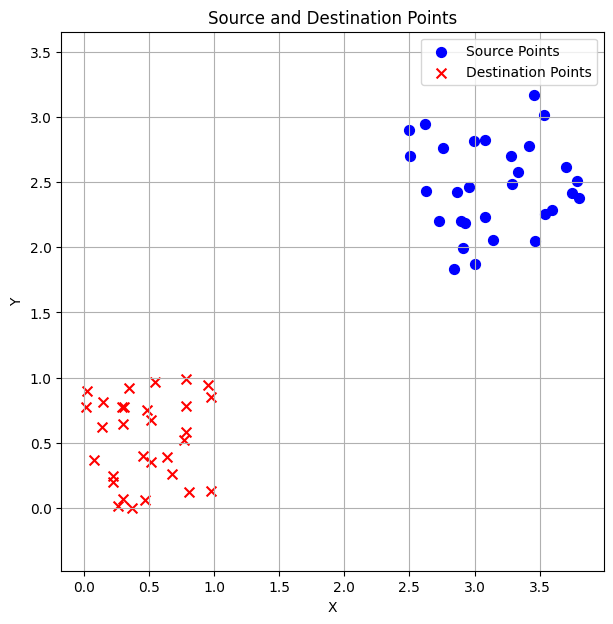

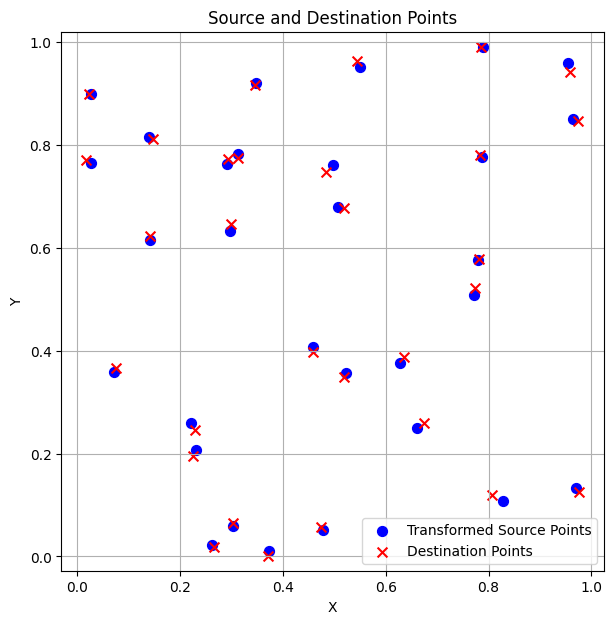

In [66]:
A = np.random.rand(30, 2)
B = A.copy()

# 1. Random rotation
theta = np.random.uniform(0, 2 * np.pi)
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# 2. Random scaling (positive, not 1)
scale = np.random.uniform(0.5, 2.0)

# 3. Random translation
t = np.random.uniform(-5, 5, size=(2,))

# 4. Add small Gaussian noise to A before transformation (makes A and B not exact match)
noise = np.random.normal(loc=0.0, scale=0.01, size=A.shape)
A = A + noise

# Apply all transformations: scale, rotate, then translate
A = scale * (R @ A.T).T + t

# Use in test function
test(A, B)

## Experiment 7: All 3 transformations (with noise + local reference)

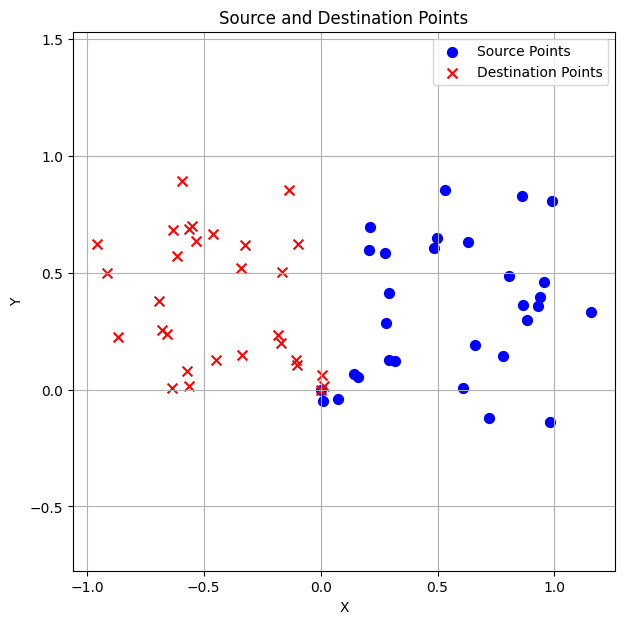

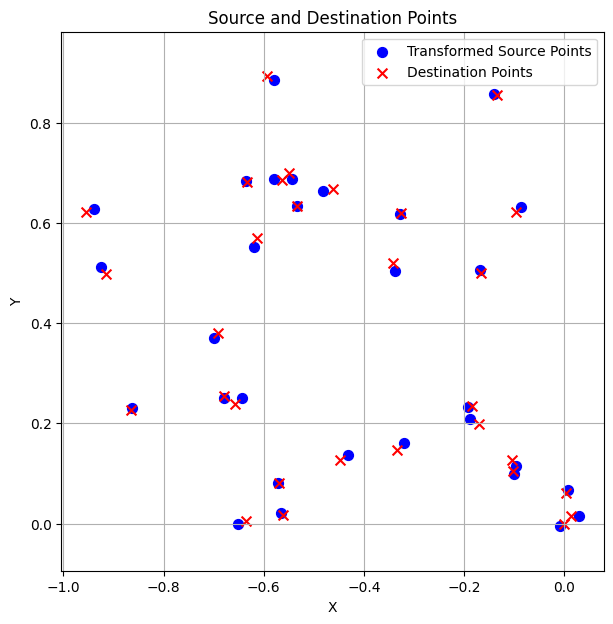

In [68]:
A = np.random.rand(30, 2)
B = A.copy()

# 1. Random rotation
theta = np.random.uniform(0, 2 * np.pi)
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# 2. Random scaling (positive, not 1)
scale = np.random.uniform(0.5, 2.0)

# 3. Random translation
t = np.random.uniform(-5, 5, size=(2,))

# 4. Add small Gaussian noise to A before transformation (makes A and B not exact match)
noise = np.random.normal(loc=0.0, scale=0.01, size=A.shape)
A = A + noise

# Apply all transformations: scale, rotate, then translate
A = scale * (R @ A.T).T + t


def set_first_point_as_reference(points):
    """
    Shift all points so that the first point becomes the origin (0,0).
    Args:
        points (np.ndarray): Nx2 array of points.
    Returns:
        np.ndarray: shifted points.
    """
    ref = points[0]
    shifted = points - ref
    return shifted

# Assign the first point as the “reference point” (local origin) for a point cloud
A = set_first_point_as_reference(A)
B = set_first_point_as_reference(B)

# Use in test function
test(A, B)